# kerasで多項式回帰！

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# modelの設計

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

# 初期値はzerosを採用。
model.add(Dense(units=1, input_dim=5, kernel_initializer='zeros'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Chapter1_model.png', show_shapes=True)

※マークダウンで表示してます。
<img src='Chapter1_model.png'>

# データの整理

In [12]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 
                   25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])
train_t

array([[  5.2],
       [  5.7],
       [  8.6],
       [ 14.9],
       [ 18.2],
       [ 20.4],
       [ 25.5],
       [ 26.4],
       [ 22.8],
       [ 17.5],
       [ 11.1],
       [  6.6]])

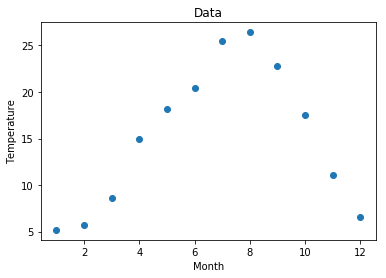

In [63]:
plt.scatter(range(1,13), train_t)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Data')

In [23]:
train_x = np.arange(1,13).reshape([12,1])
train_x = np.concatenate([train_x**0, train_x**1, train_x**2, train_x**3, train_x**4], axis=1)
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

# 学習

In [47]:
# verbose : epochの進捗。今回は可視化しない。
# fitの戻り値にLoss funcが含まれるため回収。
# あとで100,000epochsで再計算するのでここは飛ばしても良い。
history = model.fit(train_x, train_t, verbose=0, epochs=200000)

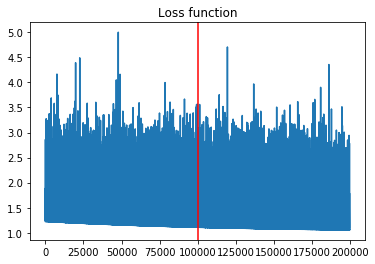

In [53]:
plt.plot(history.history['loss'])
plt.axvline(100000, color='r')
plt.title('Loss function')

In [54]:
# 最後の方は学習が進んでいないため、結局書籍の通り100,000回で切り上げる。
model.fit(train_x, train_t, verbose=0, epochs=100000)

# predict

In [59]:
linex = np.linspace(1,12,100)
# trainxのような行列に変換。
arr_linex = linex.reshape([100,1])
arr_linex = np.concatenate([arr_linex**0, arr_linex**1, arr_linex**2, arr_linex**3, arr_linex**4], axis=1)
arr_linex.shape

(100, 5)

In [60]:
liney = model.predict(arr_linex)

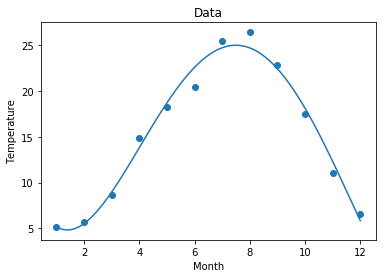

In [64]:
plt.scatter(range(1,13), train_t)
plt.plot(linex,liney)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Data')